<a href="https://colab.research.google.com/github/vinyas-bharadwaj/LCC-Projectify-Image-Classifier/blob/main/PyTorch_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/animal-faces")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vinyas bharadwaj
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces


In [ ]:
import torch
from torch import nn
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
image_path = []
labels = []

for i in os.listdir("animal-faces/afhq"):
  for label in os.listdir(f"animal-faces/afhq/{i}"):
    for image in os.listdir(f"animal-faces/afhq/{i}/{label}"):
      image_path.append(f"animal-faces/afhq/{i}/{label}/{image}")
      labels.append(label)

df = pd.DataFrame(zip(image_path, labels), columns=["image_path", "labels"])
df.head()

,image_path,labels
0,animal-faces/afhq/val/cat/pixabay_cat_001699.jpg,cat
1,animal-faces/afhq/val/cat/pixabay_cat_003165.jpg,cat
2,animal-faces/afhq/val/cat/pixabay_cat_001635.jpg,cat
3,animal-faces/afhq/val/cat/pixabay_cat_000181.jpg,cat
4,animal-faces/afhq/val/cat/flickr_cat_000688.jpg,cat


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('image_path').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('image_path')):
  _plot_series(series, series_name, i)
  fig.legend(title='image_path', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['image_path'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='index', y='image_path', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
train = df.sample(frac=0.7)
test = df.drop(train.index)

val = test.sample(frac=0.5)
test = test.drop(val.index)

train.shape, val.shape, test.shape

((11291, 2), (2420, 2), (2419, 2))

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(df['labels'])

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float)
])

In [ ]:
class CustomImageDataset(Dataset):
  def __init__(self, dataframe, transform=None):
    self.dataframe = dataframe
    self.transform = transform
    self.labels = torch.tensor(label_encoder.transform(dataframe['labels'])).to(device)

  def __getitem__(self, index):
    image = Image.open(self.dataframe.iloc[index]['image_path']).convert("RGB")
    label = self.labels[index]

    if self.transform:
      image = self.transform(image).to(device)

    return image, label

  def __len__(self):
    return self.dataframe.shape[0]

In [ ]:
train_dataset = CustomImageDataset(train, transform)
val_dataset = CustomImageDataset(val, transform)
test_dataset = CustomImageDataset(test, transform)

In [ ]:
len(train_dataset)

11291

In [ ]:
train_dataset[0]

(tensor([[[0.7725, 0.7686, 0.7647,  ..., 0.6824, 0.6784, 0.6824],
          [0.7529, 0.7490, 0.7490,  ..., 0.6745, 0.6784, 0.6824],
          [0.7333, 0.7333, 0.7294,  ..., 0.6745, 0.6784, 0.6863],
          ...,
          [0.1529, 0.1451, 0.1373,  ..., 0.4745, 0.5059, 0.5294],
          [0.1686, 0.1608, 0.1412,  ..., 0.4667, 0.5020, 0.5294],
          [0.1725, 0.1725, 0.1569,  ..., 0.4510, 0.4941, 0.5255]],
 
         [[0.6980, 0.6941, 0.6902,  ..., 0.6353, 0.6314, 0.6353],
          [0.6863, 0.6824, 0.6784,  ..., 0.6275, 0.6314, 0.6353],
          [0.6745, 0.6706, 0.6667,  ..., 0.6275, 0.6314, 0.6392],
          ...,
          [0.1373, 0.1294, 0.1216,  ..., 0.5098, 0.5373, 0.5608],
          [0.1529, 0.1451, 0.1255,  ..., 0.5098, 0.5451, 0.5686],
          [0.1569, 0.1569, 0.1412,  ..., 0.4980, 0.5451, 0.5765]],
 
         [[0.6471, 0.6510, 0.6588,  ..., 0.6353, 0.6314, 0.6353],
          [0.6392, 0.6431, 0.6510,  ..., 0.6275, 0.6314, 0.6353],
          [0.6353, 0.6392, 0.6392,  ...,

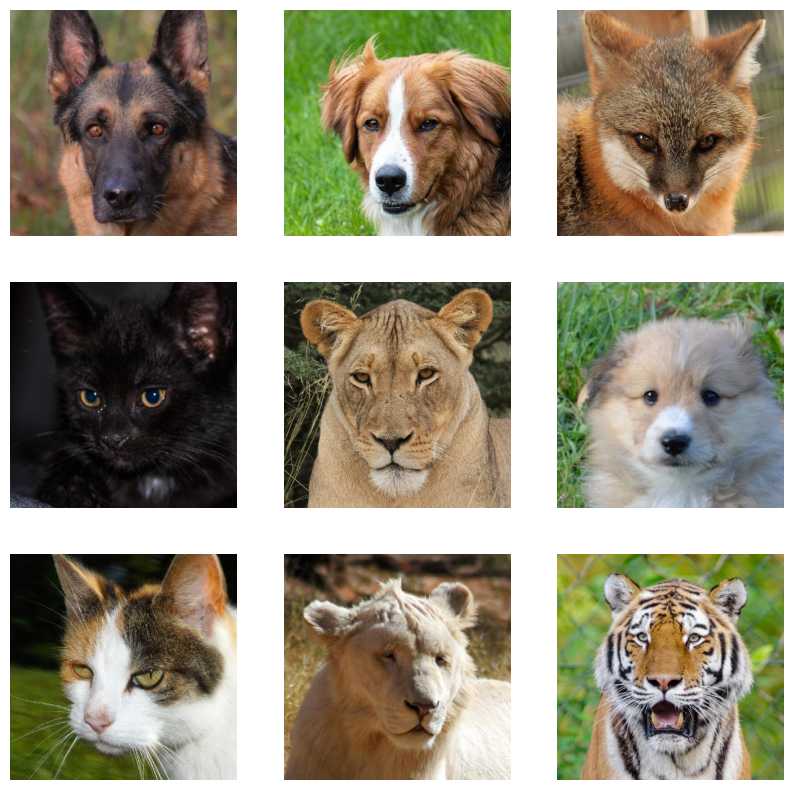

In [ ]:
n_rows = 3
n_cols = 3

f, axarr = plt.subplots(n_rows, n_cols, figsize=(10, 10))

for row in range(n_rows):
  for col in range(n_cols):
    image = Image.open(df.sample(n=1)["image_path"].iloc[0])
    axarr[row, col].imshow(image)
    axarr[row, col].axis('off')

plt.show()

In [ ]:
LR = 1e-4
BATCH_SIZE = 32
epochs = 10

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class ImageClassifier(nn.Module):
  def __init__(self):
    super(ImageClassifier, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

    self.pooling = nn.MaxPool2d((2, 2))

    self.relu = nn.ReLU()

    self.flatten = nn.Flatten()
    self.linear = nn.Linear(128*16*16, 128)

    self.output = nn.Linear(128, len(df["labels"].unique()))

  def forward(self, x):
    x = self.conv1(x) # (3, 128, 128) -> (32, 128, 128)
    x = self.pooling(x) # (32, 128, 128) -> (32, 64, 64)
    x = self.relu(x)

    x = self.conv2(x) # (32, 64, 64) -> (64, 64, 64)
    x = self.pooling(x) # (64, 64, 64) -> (64, 32, 32)
    x = self.relu(x)

    x = self.conv3(x) # (64, 32, 32) -> (128, 32, 32)
    x = self.pooling(x) # (128, 32, 32) -> (128, 16, 16)
    x = self.relu(x)

    x = self.flatten(x) # (128, 16, 16) -> (128*16*16)
    x = self.linear(x) # (128*16*16) -> (128)

    x = self.output(x) # (128) -> no.of labels

    return x


In [ ]:
model = ImageClassifier().to(device)

In [ ]:
from torchsummary import summary
summary(model, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
         MaxPool2d-2           [-1, 32, 64, 64]               0
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
         MaxPool2d-5           [-1, 64, 32, 32]               0
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
         MaxPool2d-8          [-1, 128, 16, 16]               0
              ReLU-9          [-1, 128, 16, 16]               0
          Flatten-10                [-1, 32768]               0
           Linear-11                  [-1, 128]       4,194,432
           Linear-12                    [-1, 3]             387
Total params: 4,288,067
Trainable params: 4,288,067
Non-trainable params: 0
---------------------------

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [ ]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

for epoch in range(epochs):
  train_acc = 0
  val_acc = 0
  train_loss = 0
  val_loss = 0

  for inputs, labels in train_loader:
    optimizer.zero_grad()

    predictions = model(inputs)
    loss = loss_fn(predictions, labels)
    train_loss += loss.item()

    loss.backward()
    train_acc += (predictions.argmax(dim=1) == labels).sum().item()

    optimizer.step()

  with torch.no_grad():
    for inputs, labels in val_loader:
      predictions = model(inputs)
      loss = loss_fn(predictions, labels)
      val_loss += loss.item()
      val_acc += (predictions.argmax(dim=1) == labels).sum().item()

  total_loss_train_plot.append(train_loss/len(train_loader))
  total_loss_val_plot.append(val_loss/len(val_loader))
  total_acc_train_plot.append(train_acc/len(train_dataset))
  total_acc_val_plot.append(val_acc/len(val_dataset))

  print(f"Epoch: {epoch+1}/{epochs} | Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")
  print(f"Epoch: {epoch+1}/{epochs} | Train Acc: {train_acc/len(train_dataset):.4f} | Val Acc: {val_acc/len(val_dataset):.4f}")

Epoch: 1/10 | Train Loss: 0.0189 | Val Loss: 0.1376
Epoch: 1/10 | Train Acc: 0.9945 | Val Acc: 0.9616
Epoch: 2/10 | Train Loss: 0.0186 | Val Loss: 0.1374
Epoch: 2/10 | Train Acc: 0.9942 | Val Acc: 0.9640
Epoch: 3/10 | Train Loss: 0.0159 | Val Loss: 0.1557
Epoch: 3/10 | Train Acc: 0.9956 | Val Acc: 0.9657
Epoch: 4/10 | Train Loss: 0.0125 | Val Loss: 0.2351
Epoch: 4/10 | Train Acc: 0.9963 | Val Acc: 0.9450
Epoch: 5/10 | Train Loss: 0.0096 | Val Loss: 0.1740
Epoch: 5/10 | Train Acc: 0.9979 | Val Acc: 0.9612
Epoch: 6/10 | Train Loss: 0.0046 | Val Loss: 0.1589
Epoch: 6/10 | Train Acc: 0.9993 | Val Acc: 0.9661
Epoch: 7/10 | Train Loss: 0.0028 | Val Loss: 0.1883
Epoch: 7/10 | Train Acc: 0.9996 | Val Acc: 0.9645
Epoch: 8/10 | Train Loss: 0.0078 | Val Loss: 0.1937
Epoch: 8/10 | Train Acc: 0.9975 | Val Acc: 0.9612
Epoch: 9/10 | Train Loss: 0.0140 | Val Loss: 0.1795
Epoch: 9/10 | Train Acc: 0.9955 | Val Acc: 0.9607
Epoch: 10/10 | Train Loss: 0.0031 | Val Loss: 0.1721
Epoch: 10/10 | Train Acc: 0.9

In [ ]:
with torch.no_grad():
  test_loss = 0
  test_acc = 0

  for inputs, labels in test_loader:
    predictions = model(inputs)
    loss = loss_fn(predictions, labels)

    test_loss += loss.item()

    test_acc += (predictions.argmax(dim=1) == labels).sum().item()

print(f"Test Loss: {test_loss/len(test_loader):.4f}")
print(f"Test Acc: {test_acc/len(test_dataset):.4f}")

Test Loss: 0.1257
Test Acc: 0.9706


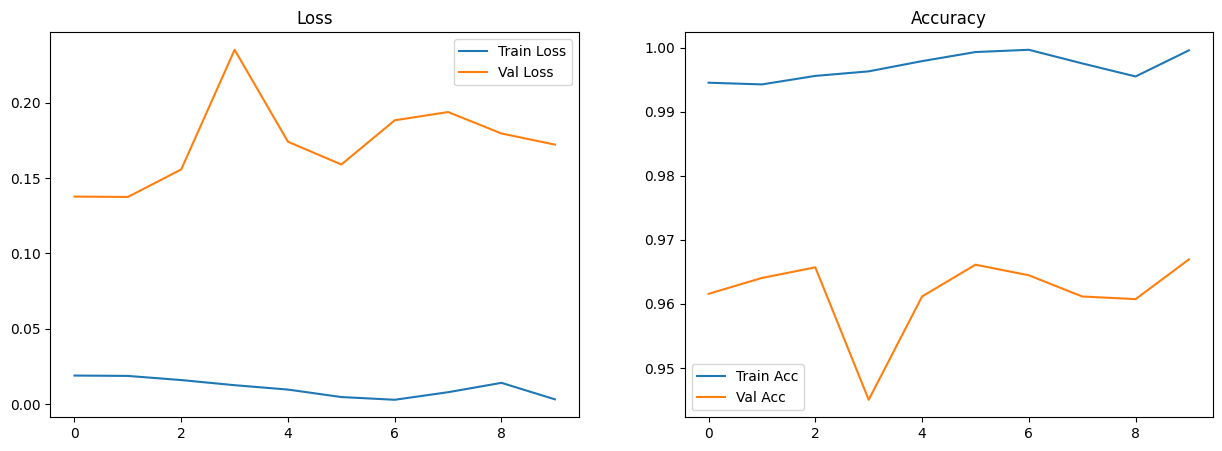

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label="Train Loss")
axs[0].plot(total_loss_val_plot, label="Val Loss")
axs[0].set_title("Loss")
axs[0].legend()

axs[1].plot(total_acc_train_plot, label="Train Acc")
axs[1].plot(total_acc_val_plot, label="Val Acc")
axs[1].set_title("Accuracy")
axs[1].legend()

plt.show()